<a href="https://colab.research.google.com/github/Chris21-lkb/Food101_deep_learning/blob/main/Project1(Food101).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 1:Food Vision Big



In [ ]:
# Check GPU 

!nvidia-smi

Sat Dec  4 16:22:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-12-04 16:22:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-04 16:22:38 (92.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow Datasets to Download Data

In [ ]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [ ]:
# List all available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list) # is our target dataset in the list of TFDS datasets ?

True


In [ ]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=False,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete6HKAPP/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete6HKAPP/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded)
* Do the labels match up with the class names

In [ ]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Take one sample of the train data
train_one_sample = train_data.take(1) # Samples are in format (image_tensor, label)

In [ ]:
# What does one sample of our training data look like ?
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape},
  Image datatype: {image.dtype},
  Target class from Food101 (tensor form): {label},
  Class name (str from): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target class from Food101 (tensor form): 56,
  Class name (str from): huevos_rancheros
  


In [ ]:
# What does our image tensor from TFDS's Food101 look like ?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

In [ ]:
# What are the min and max values of our image tensor ?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## Plot an image Tensorflow Datasets

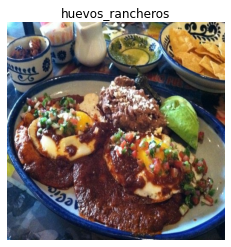

In [ ]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

## Create preprocessing functions for our data

Neural network perform best when data is in certain way (e.g. batched, normalized, etc).

However, not all data (including data from TensorFlow Datasets) comes like this.

So in order to get it ready for a neural network, you will often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:    
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a bacth to be of the same size 
* Scaled (values between 0 & 1 ) also called normalized tensors generally perform better


Within these points in mind, we have got a few things we can tackle with a preprocessing function

Since we are going to be using an EfficientNetBx pretrained model from tf.keras.applications we do not need to rescale our data (these architectures have rescalling built-in)

This means our functions need to:    
* 1. Reshape our images to all the same size
* 2. Convert the dtype of our image from `uint8` to `float32`

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  image=tf.image.resize(image, [img_shape, img_shape])
  # image = image/255. # Scale image values
  return tf.cast(image, tf.float32), label # return (float32_image, lable) tuple

In [ ]:
# Try our new function
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape}, \nDatatype: {image.dtype}\n")
print(f"Image before preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}\n")

Image before preprocessing:
 [[[233 253 251]
  [231 253 250]
  [228 254 251]
  ...
  [ 85  82  89]
  [ 68  67  75]
  [ 57  57  67]]

 [[232 254 252]
  [229 254 251]
  [226 255 251]
  ...
  [121 116 120]
  [100  99 104]
  [ 86  85  91]]]...,
Shape: (512, 512, 3), 
Datatype: <dtype: 'uint8'>

Image before preprocessing:
 [[[230.65816  253.64285  251.      ]
  [222.99998  254.97449  252.19388 ]
  [207.06633  255.       250.36734 ]
  ...
  [140.66287  129.52519  121.22428 ]
  [121.14268  115.265144 116.95397 ]
  [ 83.95363   83.08119   89.63737 ]]

 [[221.47449  254.37755  253.33163 ]
  [214.5102   255.       253.92348 ]
  [198.41327  254.58673  251.96939 ]
  ...
  [208.66318  195.82143  173.40823 ]
  [197.03056  190.1071   174.83162 ]
  [175.54036  171.6169   161.21384 ]]]...,
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>



In [ ]:
train_data

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

## Batch & prepare datasets

We'are going to make our data input pipeline run really fast.

In [ ]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
# Map preprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data.element_spec, test_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int64, name=None)))

## Create modelling callbacks

We are going to create a couple of callbacks to help us while our model trains:

* TensorBoard callback to log training results (so we can visualize them later if need be)
* ModelCheckpoint callback to save our model's progress after feature extraction

In [ ]:
import datetime
# Create tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
# Create ModelCheckpoint callback to save a model's progress during training 
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

## Setup mixed precision training 

Mixed precision utilizes a combination of float32 and float26 data types to speed up model performance.

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla P100-PCIE-16GB, compute capability 6.0
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla P100-PCIE-16GB, compute capability 6.0
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extraction model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# # Create data augmentation
# data_augmentation = keras.Sequential([
#   preprocessing.RandomFlip("horizontal"),
#   preprocessing.RandomRotation(0.2),
#   preprocessing.RandomZoom(0.2),
#   preprocessing.RandomHeight(0.2),
#   preprocessing.RandomWidth(0.2),
#   #preprocessing.Rescaling(1./255)
# ], name="data_augmentation")


# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# x = data_augmentation(inputs)
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
# x = layers.Dense(len(class_names))(x)
# outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


## Checking layer dtype policies (are we using precision)

In [ ]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


Going through the above we see:
* `layer.name`: the human readable name of a paticular layer
* `layer.trainable`: is the layer trainable or npt ?
* `layer.dtype`: the data type a layer stores its variables in
* `layer.dtype_policy`: the data type policy a layer computes on its variables with

In [ ]:
# Check the dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False flo

## Fit the feature extraction model

If our goal is to fine-tune a pretrained model, the general order of doing things is:

1. Build a feature extraction model(train a couple output layers with base layers frozen)
2. Fine-tune some of the frozen layers

In [ ]:
# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.1*len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetb0_101"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101/20211204-163138
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2368/2368 [==============================] - ETA: 0s - loss: 1.8216 - accuracy: 0.5561WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 107s 39ms/step - loss: 1.8216 - accuracy: 0.5561 - val_loss: 1.2339 - val_accuracy: 0.6717
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2948 - accuracy: 0.6666WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 92s 38ms/step - loss: 1.2947 - accuracy: 0.6666 - val_loss: 1.1285 - val_accuracy: 0.6926
Epoch 3/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.1447 - accuracy: 0.7023WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 92s 38ms/step - loss: 1.1446 - accuracy: 0.7023 - val_loss: 1.0978 - val_accuracy: 0.7053


In [ ]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 26s 33ms/step - loss: 1.0988 - accuracy: 0.7038


[1.0988142490386963, 0.7037623524665833]

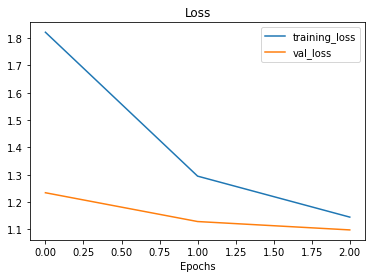

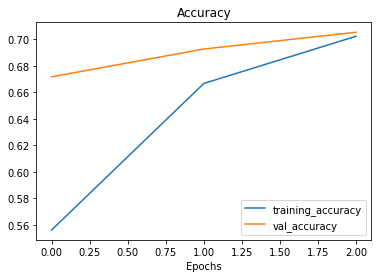

In [ ]:
# plot loss curves
plot_loss_curves(history_101_food_classes_feature_extract)

## Fine-Tuning

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

In [ ]:
# Refreeze every layer execpt the last 5
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
# what layers are in our base model
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
efficientnetb0 True
global_average_pooling2d True
output_layer True


In [ ]:
# Check which layers are trainable in our base model
for layer_number, layer in enumerate(model.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# Recompile our model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=29>

In [ ]:
# Fine tune the model for 5 more epochs
fine_tune_epoch = 13

# Fit the fine-tune model
history_fine_tune = model.fit(train_data,
                              epochs = fine_tune_epoch,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = int(0.1*len(test_data)),
                              initial_epoch = history_101_food_classes_feature_extract.epoch[-1],
                              callbacks = [create_tensorboard_callback(dir_name = "training_logs",
                                                                     experiment_name = "efficientnetb0_101-fine-tuned"),
                                         model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101-fine-tuned/20211204-163746


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 3/13
2368/2368 [==============================] - ETA: 0s - loss: 0.9482 - accuracy: 0.7493WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 106s 42ms/step - loss: 0.9482 - accuracy: 0.7493 - val_loss: 1.0023 - val_accuracy: 0.7211
Epoch 4/13
2367/2368 [============================>.] - ETA: 0s - loss: 0.8011 - accuracy: 0.7871WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 99s 41ms/step - loss: 0.8011 - accuracy: 0.7871 - val_loss: 0.9868 - val_accuracy: 0.7251
Epoch 5/13
2368/2368 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.8169WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 99s 41ms/step - loss: 0.6905 - accuracy: 0.8169 - val_loss: 0.9892 - val_accuracy: 0.7310
Epoch 6/13
2367/2368 [============================>.] - ETA: 0s - loss: 0.5962 - accuracy: 0.8440WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 99s 41ms/step - loss: 0.5962 - accuracy: 0.8440 - val_loss: 0.9905 - val_accuracy: 0.7338
Epoch 7/13
2367/2368 [============================>.] - ETA: 0s - loss: 0.5118 - accuracy: 0.8696WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 101s 42ms/step - loss: 0.5118 - accuracy: 0.8696 - val_loss: 0.9978 - val_accuracy: 0.7330
Epoch 8/13
2368/2368 [==============================] - ETA: 0s - loss: 0.4383 - accuracy: 0.8910WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 99s 41ms/step - loss: 0.4383 - accuracy: 0.8910 - val_loss: 1.0328 - val_accuracy: 0.7306
Epoch 9/13
2367/2368 [============================>.] - ETA: 0s - loss: 0.3731 - accuracy: 0.9106WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 99s 41ms/step - loss: 0.3731 - accuracy: 0.9106 - val_loss: 1.0488 - val_accuracy: 0.7350
Epoch 10/13
2368/2368 [==============================] - ETA: 0s - loss: 0.3141 - accuracy: 0.9279WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 102s 42ms/step - loss: 0.3141 - accuracy: 0.9279 - val_loss: 1.0648 - val_accuracy: 0.7306
Epoch 11/13
2368/2368 [==============================] - ETA: 0s - loss: 0.2633 - accuracy: 0.9433WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 99s 41ms/step - loss: 0.2633 - accuracy: 0.9433 - val_loss: 1.1107 - val_accuracy: 0.7235
Epoch 12/13
2367/2368 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9568WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 99s 41ms/step - loss: 0.2178 - accuracy: 0.9568 - val_loss: 1.1368 - val_accuracy: 0.7259
Epoch 13/13
2368/2368 [==============================] - ETA: 0s - loss: 0.1782 - accuracy: 0.9679WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 99s 41ms/step - loss: 0.1782 - accuracy: 0.9679 - val_loss: 1.1761 - val_accuracy: 0.7231


In [ ]:
# Evaluate the fine-tuned model
fine_tuned_model = model.evaluate(test_data)

790/790 [==============================] - 25s 32ms/step - loss: 1.1835 - accuracy: 0.7240


In [ ]:
fine_tuned_model

[1.1834561824798584, 0.7239999771118164]

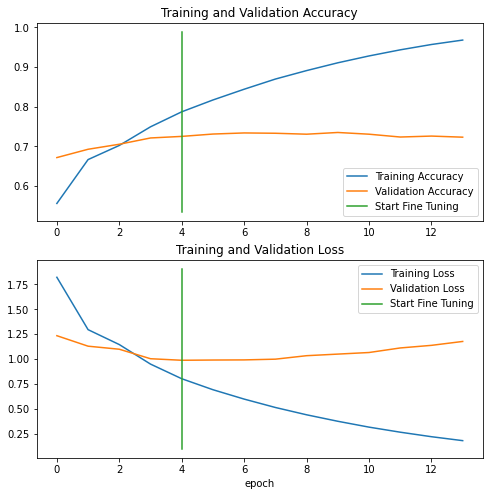

In [ ]:
# Compare the histories of the two model

compare_historys(history_101_food_classes_feature_extract, history_fine_tune)

## Making predictions with our trained model

In [ ]:
preds_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 26s 30ms/step


In [ ]:
# Let's see what the first 10 predictions look like
preds_probs[:10]

array([[1.777e-04, 0.000e+00, 0.000e+00, ..., 1.842e-05, 2.980e-07,
        2.359e-03],
       [5.960e-08, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.289e-05,
        0.000e+00],
       [0.000e+00, 3.576e-07, 0.000e+00, ..., 0.000e+00, 8.345e-07,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.967e-06,
        0.000e+00],
       [1.753e-01, 1.192e-06, 3.195e-05, ..., 1.947e-03, 1.192e-06,
        5.905e-03]], dtype=float16)

In [ ]:
# First prediction probabiity array
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([1.777e-04, 0.000e+00, 0.000e+00, 1.192e-07, 3.934e-06, 0.000e+00,
        0.000e+00, 2.027e-06, 2.083e-03, 1.580e-05, 2.086e-06, 0.000e+00,
        6.336e-05, 3.219e-06, 9.832e-04, 4.768e-07, 3.219e-04, 7.482e-04,
        0.000e+00, 2.980e-07, 0.000e+00, 1.594e-04, 1.512e-03, 5.960e-08,
        0.000e+00, 0.000e+00, 5.960e-07, 3.904e-05, 1.192e-07, 8.945e-01,
        3.308e-02, 1.210e-05, 0.000e+00, 0.000e+00, 3.666e-05, 0.000e+00,
        4.888e-06, 4.172e-07, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.345e-07, 0.000e+00, 0.000e+00, 5.991e-02, 0.000e+00, 0.000e+00,
        5.960e-08, 2.205e-06, 0.000e+00, 0.000e+00, 5.960e-08, 9.537e-07,
        0.000e+00, 0.000e+00, 9.716e-06, 3.576e-07, 1.584e-03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.576e-07, 0.000e+00, 0.000e+00, 3.695e-06, 0.000e+00, 0.000e+00,
        6.108e-04, 8.011e-05, 0.000e+00, 0.000e+00, 0.000e+00, 5.960e-08,
        0.000e+00, 0.000e+00, 0.000e+0

In [ ]:
# Get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(preds_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [1.777e-04 0.000e+00 0.000e+00 1.192e-07 3.934e-06 0.000e+00 0.000e+00
 2.027e-06 2.083e-03 1.580e-05 2.086e-06 0.000e+00 6.336e-05 3.219e-06
 9.832e-04 4.768e-07 3.219e-04 7.482e-04 0.000e+00 2.980e-07 0.000e+00
 1.594e-04 1.512e-03 5.960e-08 0.000e+00 0.000e+00 5.960e-07 3.904e-05
 1.192e-07 8.945e-01 3.308e-02 1.210e-05 0.000e+00 0.000e+00 3.666e-05
 0.000e+00 4.888e-06 4.172e-07 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 8.345e-07 0.000e+00 0.000e+00 5.991e-02 0.000e+00 0.000e+00 5.960e-08
 2.205e-06 0.000e+00 0.000e+00 5.960e-08 9.537e-07 0.000e+00 0.000e+00
 9.716e-06 3.576e-07 1.584e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 3.576e-07 0.000e+00 0.000e+00 3.695e-06
 0.000e+00 0.000e+00 6.108e-04 8.011e-05 0.000e+00 0.000e+00 0.000e+00
 5.960e-08 0.000e+00 0.000e+00 0.000e+00 1.788e-07 4.172e-07 1.420e-03
 0.000e+00 0.000e+00 0.000e+00 7.749e-07 0.00

In [ ]:
class_names[29]

'cup_cakes'

In [ ]:
# Get the prediction classes for each label
pred_classes = preds_probs.argmax(axis=1)

pred_classes[:10]

array([29, 81, 91, 53, 97, 97, 10, 31,  3, 16])

In [ ]:
# How many prediction classes do we have ?
len(pred_classes)

25250

Now we have got a predictions array of all our model's predictions, to evaluate them , we need to compare to the original dataset labels

In [ ]:
# Let's get our test label
import numpy as np
test_labels = np.concatenate([y for x, y in test_data], axis=0)
test_labels[:10]

array([ 29,  81,  91,  53,  97,  97,  10,  31,   3, 100])

## Evaluating our model

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(test_labels, pred_classes)
sklearn_accuracy

0.724

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.61      0.45      0.52       250
           1       0.68      0.65      0.67       250
           2       0.86      0.77      0.81       250
           3       0.75      0.77      0.76       250
           4       0.62      0.59      0.60       250
           5       0.50      0.70      0.58       250
           6       0.74      0.88      0.80       250
           7       0.78      0.92      0.84       250
           8       0.53      0.50      0.51       250
           9       0.74      0.54      0.62       250
          10       0.71      0.58      0.64       250
          11       0.73      0.79      0.76       250
          12       0.86      0.70      0.77       250
          13       0.81      0.64      0.71       250
          14       0.70      0.68      0.69       250
          15       0.51      0.58      0.55       250
          16       0.45      0.67      0.53       250
          17       0.75    

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(test_labels, pred_classes, output_dict=True)

In [ ]:
# Let's plot all of our class F1-score
# Step 1. Create an empty dictionary
class_f1_scores = {}

# Step2. Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.5195402298850575,
 'baby_back_ribs': 0.6666666666666666,
 'baklava': 0.8118393234672305,
 'beef_carpaccio': 0.7598425196850394,
 'beef_tartare': 0.6012269938650306,
 'beet_salad': 0.5838926174496644,
 'beignets': 0.8007312614259597,
 'bibimbap': 0.843462246777164,
 'bread_pudding': 0.5123966942148761,
 'breakfast_burrito': 0.6203703703703705,
 'bruschetta': 0.6389496717724288,
 'caesar_salad': 0.7600767754318617,
 'cannoli': 0.7736263736263737,
 'caprese_salad': 0.7142857142857143,
 'carrot_cake': 0.6869918699186993,
 'ceviche': 0.546816479400749,
 'cheese_plate': 0.7306122448979593,
 'cheesecake': 0.5344,
 'chicken_curry': 0.6335174953959483,
 'chicken_quesadilla': 0.7601626016260162,
 'chicken_wings': 0.8158415841584158,
 'chocolate_cake': 0.6116071428571428,
 'chocolate_mousse': 0.5042735042735041,
 'churros': 0.8466522678185745,
 'clam_chowder': 0.8014705882352942,
 'club_sandwich': 0.7991543340380549,
 'crab_cakes': 0.5869565217391305,
 'creme_brulee': 0.8237623762

In [ ]:
# Turn f1_scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)

In [ ]:
f1_scores[:10]

,class_names,f1-score
33,edamame,0.983806
63,macarons,0.913580
64,miso_soup,0.886228
54,hot_and_sour_soup,0.882114
75,pho,0.876000
45,frozen_yogurt,0.873786
88,seaweed_salad,0.867850
69,oysters,0.866920
68,onion_rings,0.866267
32,dumplings,0.858871


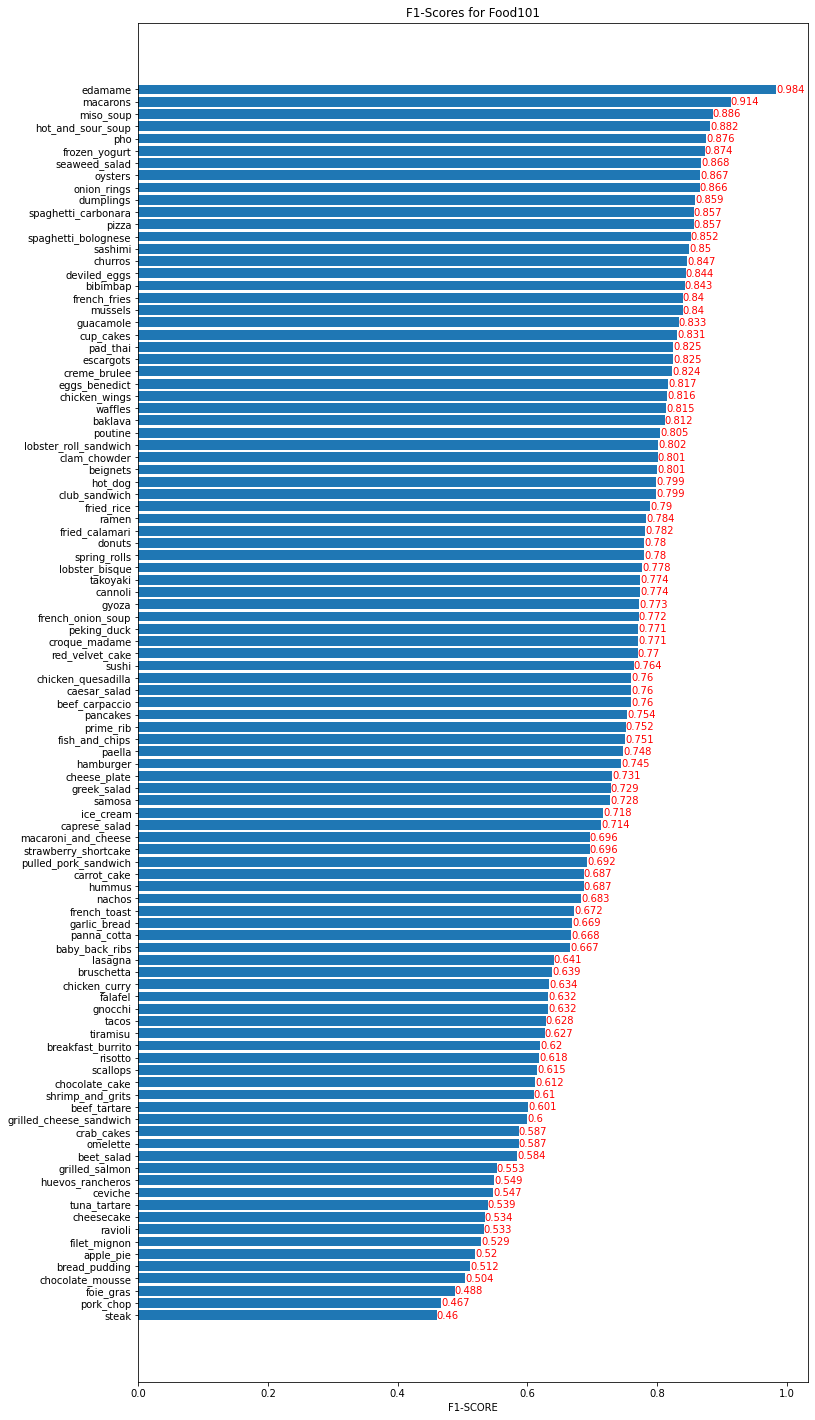

In [ ]:
import matplotlib.pyplot as plt
fi, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-SCORE")
ax.set_title("F1-Scores for Food101")
ax.invert_yaxis()
for i, v in enumerate(round(f1_scores["f1-score"],3)):
    ax.text(v, i + .25, str(v), color='red');

## Visualize our prediction

In [ ]:
# Let's get our images ready from test_data
test_image_batches = []
for images, labels in test_data.take(-1):
  test_image_batches.append(images.numpy())

test_images = [item for sublist in test_image_batches for item in sublist]

In [ ]:
len(test_images)

25250

In [ ]:
Predictions = pd.DataFrame({"Image Index" : list(range(25250)),
                            "Test Labels" : list(test_labels),
                            "Test classes" : [class_names[i] for i in test_labels],
                            "Predictions Labels" : list(np.asarray(pred_classes)),
                            "Predictions Classes": [class_names[i] for i in pred_classes],
                            "Predictions Probability": [x for x in np.asarray(tf.reduce_max(preds_probs, axis=1))]})

In [ ]:
import random

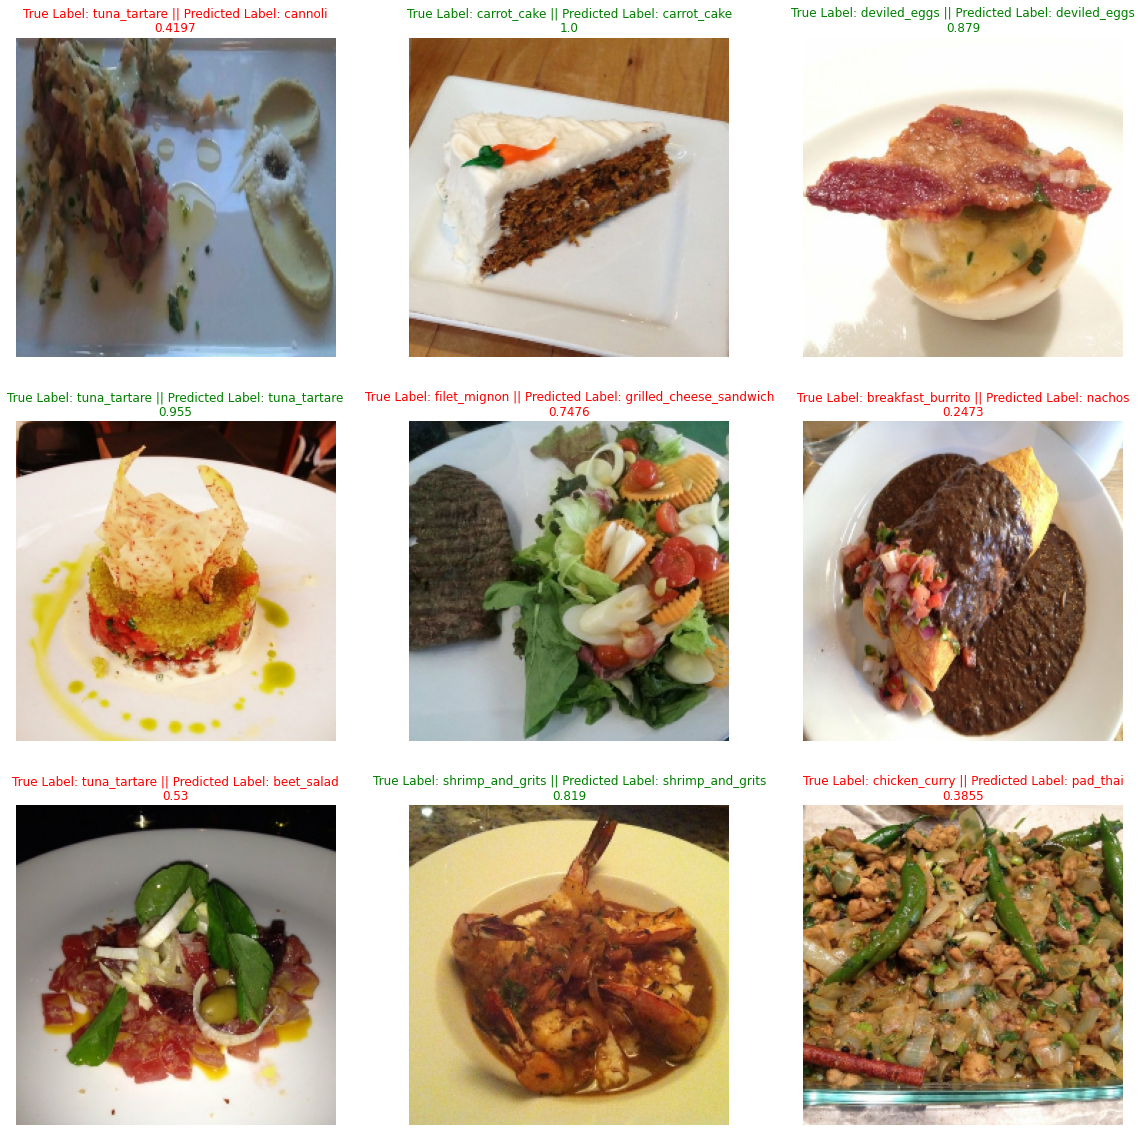

In [ ]:
plt.figure(figsize = (20,20))
for i in range(9):
    random_int_index = random.choice(range(len(test_images)))
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[random_int_index]/255.)

    if test_labels[random_int_index] == pred_classes[random_int_index]:
        color = "g"
    else:
        color = "r"
    plt.title("True Label: " + class_names[test_labels[random_int_index]] + " || " + "Predicted Label: " +
              class_names[pred_classes[random_int_index]] + "\n" + 
              str(np.asarray(tf.reduce_max(preds_probs, axis = 1))[random_int_index]), c=color)
    plt.axis(False);

## Find the most wrong predictions